# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Ejemplos de Ensembles</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#7F000E" size=5>Índice</font></h2>

* [1. Preliminares](#section1)
* [2. Voting](#section2)
* [3. Bagging](#section3)
* [4. Random Forest](#section4)
* [5. Extra Trees Classifier](#section5)
* [6. Boosting AdaBoost](#section6)
* [7. Gradient Boost](#section7)



<a id="section1"></a>
# <font color="#7F000E"> 1. Preliminares</font>

En primer lugar veremos las importaciones de paquetes que nos van a ir haciedo falta

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

Definicion especial para poder dibujar algunas regiones de decisión para los clasificadores que iremos probando

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X_train, Y_train, X_test, Y_test, classifier, transformer=None, probs=False, resolucion=0.02, margin=0):

    # Establece colores y marcas
    markers = ('x', 'o', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    color_map = ListedColormap(colors[:len(np.unique(Y_train))])
    color_map_probs = plt.cm.RdBu
    
    # Rangos
    x1_min, x1_max = X_train[:, 0].min()-margin, X_train[:,0].max()+margin
    x2_min, x2_max = X_train[:, 1].min()-margin, X_train[:,1].max()+margin

    # Crea los puntos del plano y les da un valor, para luego colorearlos. 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolucion),np.arange(x2_min, x2_max,resolucion))
    
    # Le aplica la transformación que a los puntos del plano
    X_points = np.array([xx1.ravel(), xx2.ravel()]).T
    if transformer!=None:
        X_points = transformer.fit_transform(X_points,grado)

    # Obtiene el valor de cada punto, 
    if probs==False:
        Z = classifier.predict(X_points)
    elif hasattr(classifier, "decision_function"):
        Z = classifier.decision_function(X_points)
    else:
        Z = classifier.predict_proba(X_points)[:, 1]
            
    # Reorganiza los puntos
    Z.shape = xx1.shape
    # Colorea la superficie.
    if probs==False:
        alpha=0.1
    else:
        alpha=0.2
    plt.contourf(xx1, xx2, Z, cmap=color_map_probs, alpha=alpha) 
    # Alternativa plt.pcolormesh(xx1, xx2, Z, cmap=cmap, alpha=0.1)
    
    # Si hay puntos de test, dibuja los de training transparentes.
    if len(Y_test)==0:
        alpha_train = 1
    else:
        alpha_train=0.1
        
    for idx, cl in enumerate(np.unique(Y_train)):
        plt.scatter(X_train[Y_train==cl,0], X_train[Y_train==cl,1], alpha=alpha_train, lw=1, c = colors[idx], marker = markers[idx], label=cl)

    #Dibuja los puntos para el conjunto de test
    for idx, cl in enumerate(np.unique(Y_test)):
        plt.scatter(X_test[Y_test==cl,0], X_test[Y_test==cl,1], alpha=1, lw=1, c = colors[idx], marker = markers[idx], label=cl)    
        
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.show()
    

In [3]:
from sklearn import datasets
X,y = datasets.load_breast_cancer(return_X_y=True)

---

<a id="section2"></a>
# <font color="#7F000E"> 2. Voting</font>

Training:  0.95
Test:  0.75
Training:  0.875
Test:  0.85
Training:  0.925
Test:  0.75


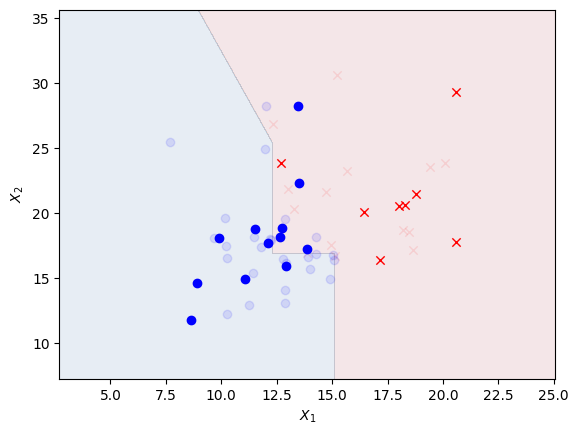

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

perm = np.random.permutation(X.shape[0])
X = X[perm,:]
y = y[perm]
rind= np.random.choice(X.shape[0], size=60, replace=False)
X = X[rind,:]
y = y[rind]

# Variables de interés
X = X[:,0:2]

# Hace las particiones de training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Aprende el modelo
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",tree.score(X_train, y_train))
print("Test: ",tree.score(X_test, y_test))

# Dibuja las fronteras de decisión
#plot_decision_regions(X_train, y_train, X_test, y_test, tree, probs=False, resolucion=0.02, margin=5)


# Aprende el modelo
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",logreg.score(X_train, y_train))
print("Test: ",logreg.score(X_test, y_test))

# Dibuja las fronteras de decisión
#plot_decision_regions(X_train, y_train, X_test, y_test, logreg, pol_feat, probs=False,resolucion=0.02, margin=5)


from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('tree', tree), ('logreg', logreg)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",eclf1.score(X_train, y_train))
print("Test: ",eclf1.score(X_test, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, eclf1, probs=False,resolucion=0.02, margin=5)


---

<a id="section3"></a>
# <font color="#7F000E"> 3. Bagging</font>

Training:  0.95
Test:  0.75


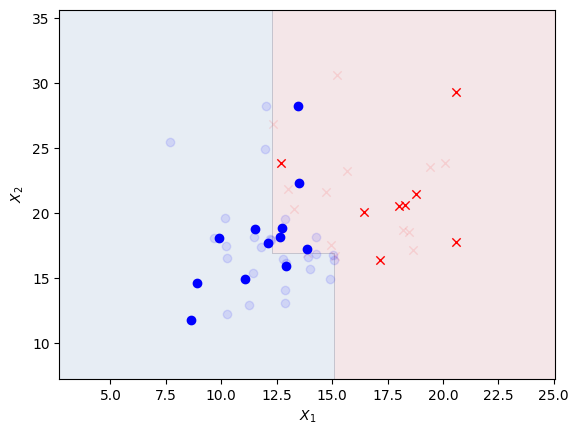

In [5]:
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Aprende el modelo
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",tree.score(X_train, y_train))
print("Test: ",tree.score(X_test, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, 
                      tree, probs=False, resolucion=0.02, margin=5)


Ahora utilizando Bagging con la misma configuración de árbol

Training:  1.0
Test:  0.8


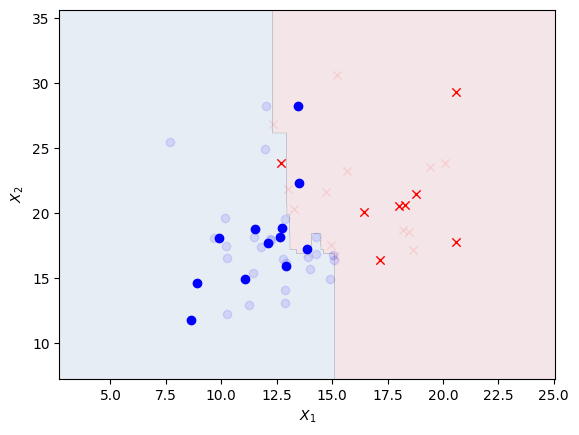

In [6]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(tree, n_estimators=50, max_samples=1.0, bootstrap=True)
bagging.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ", bagging.score(X_train, y_train))
print("Test: ", bagging.score(X_test, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, bagging, probs=False, resolucion=0.02, margin=5)


Bagging con otro modelo de clasificador: Regresion Logistica.

Training:  0.875
Test:  0.85


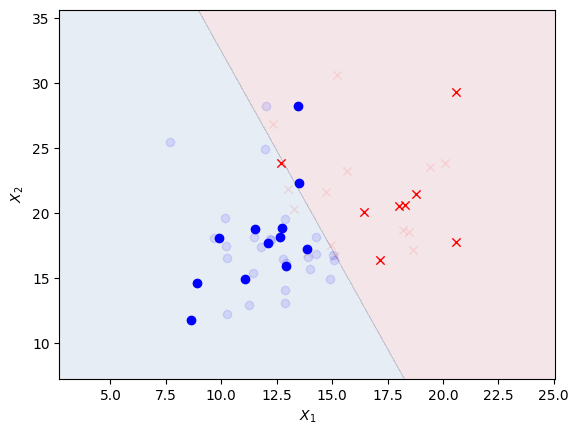

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Aprende el modelo
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",logreg.score(X_train, y_train))
print("Test: ",logreg.score(X_test, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, 
                      logreg, probs=False,
                      resolucion=0.02, margin=5)


Training:  0.85
Test:  0.9


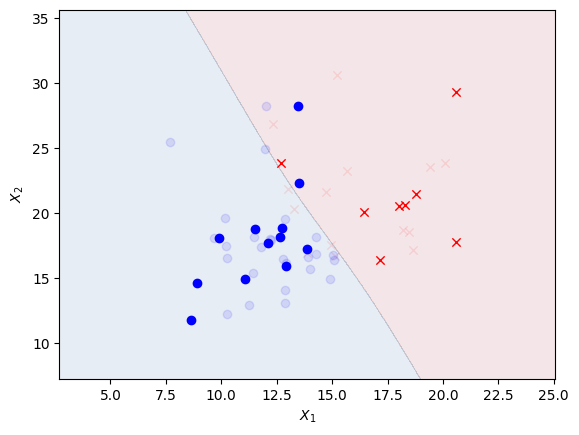

In [8]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(logreg, n_estimators=50, max_samples=1.0, bootstrap=True)
bagging.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ", bagging.score(X_train, y_train))
print("Test: ", bagging.score(X_test, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, bagging, probs=False, resolucion=0.02, margin=5)


Bagging con otro modelo de clasificador: Redes Neuronales

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10,), max_iter=10000,
              random_state=1, solver='lbfgs', warm_start=True)
Training:  0.925
Test:  0.9


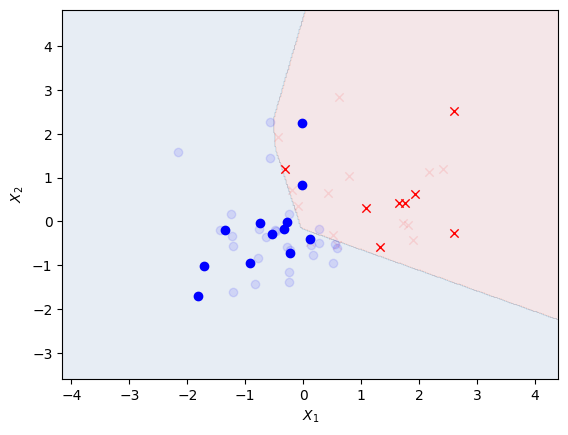

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler


# Estandariza las variables de entrada
ss = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_sd = ss.fit_transform(X_train)
X_test_sd = ss.transform(X_test)

# Aprende el modelo
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='relu', hidden_layer_sizes=(10,), 
                    random_state=1, warm_start=True, max_iter=10000)
mlp.fit(X_train_sd, y_train)

print(mlp)

# Imprime las tasas de acierto
print("Training: ",mlp.score(X_train_sd, y_train))
print("Test: ",mlp.score(X_test_sd, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train_sd, y_train, X_test_sd, y_test,  mlp,  probs=False, resolucion=0.02, margin=2)


Training:  0.975
Test:  0.85


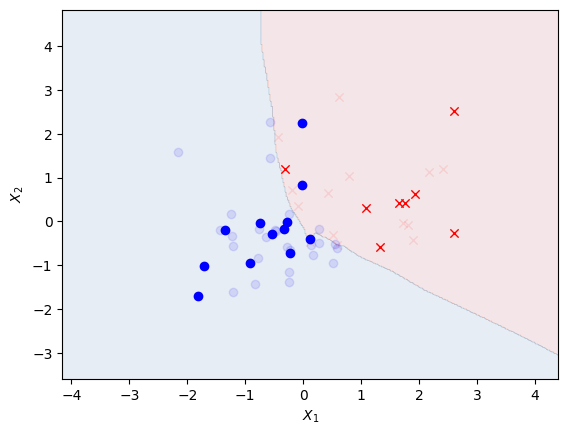

In [10]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(mlp, n_estimators=50, max_samples=1.0,bootstrap=True)
bagging.fit(X_train_sd, y_train)

# Imprime las tasas de acierto
print("Training: ", bagging.score(X_train_sd, y_train))
print("Test: ", bagging.score(X_test_sd, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train_sd, y_train, X_test_sd, y_test, bagging, probs=False, resolucion=0.02, margin=2)


---

<a id="section4"></a>
# <font color="#7F000E"> 4. Random Forest</font>

Training:  0.95
Test:  0.75
Profundidad del árbol:  4


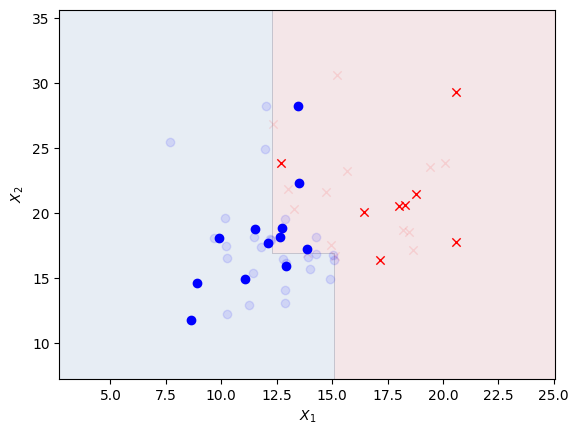

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Aprende el modelo
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",tree.score(X_train, y_train))
print("Test: ",tree.score(X_test, y_test))
print("Profundidad del árbol: ", tree.tree_.max_depth)
# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, 
                      tree, probs=False, resolucion=0.02, margin=5)


Ahora con Random Forest.

Training:  1.0
Test:  0.85
Profundidad de los árboles:  4


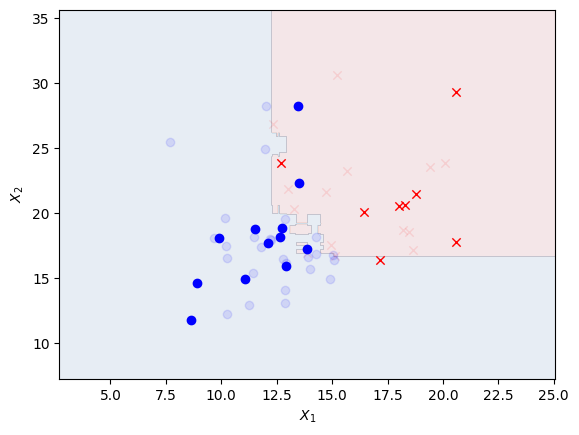

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=4)
rf.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",rf.score(X_train, y_train))
print("Test: ",rf.score(X_test, y_test))
print("Profundidad de los árboles: ", rf.max_depth)
# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, rf, probs=False, resolucion=0.02, margin=5)


---

<a id="section5"></a>
# <font color="#7F000E"> 5. ExtraTreesClassifer</font>

Training:  0.875
Test:  0.85
Profundidad de los árboles:  4


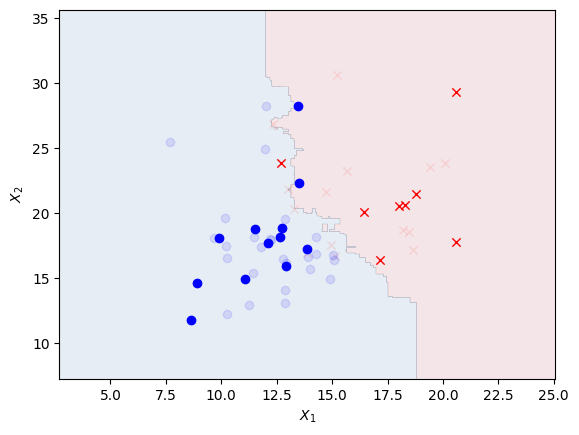

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
extree = ExtraTreesClassifier(n_estimators=50, max_depth=4)
extree.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",extree.score(X_train, y_train))
print("Test: ",extree.score(X_test, y_test))
print("Profundidad de los árboles: ", extree.max_depth)
# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, extree, probs=False, resolucion=0.02, margin=5)


---

<a id="section6"></a>
# <font color="#7F000E"> 6. AdaBoost</font>

Training:  1.0
Test:  0.85


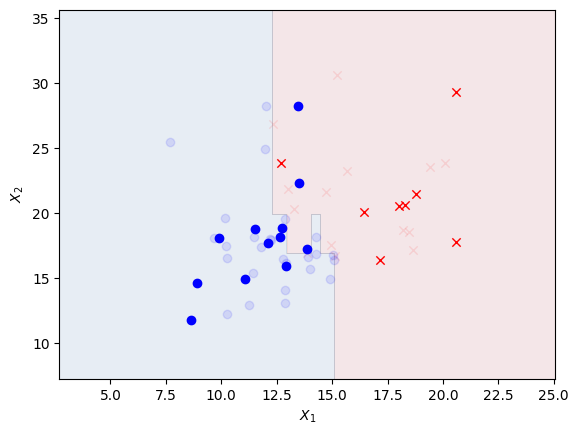

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

aboost = AdaBoostClassifier(
    estimator=tree,
    n_estimators=50,
    learning_rate=0.05
)
aboost.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ", aboost.score(X_train, y_train))
print("Test: ", aboost.score(X_test, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, aboost, probs=False, resolucion=0.02, margin=5)


---

<a id="section7"></a>
# <font color="#7F000E"> 7. Gradient Boosting</font>

Training:  1.0
Test:  0.85


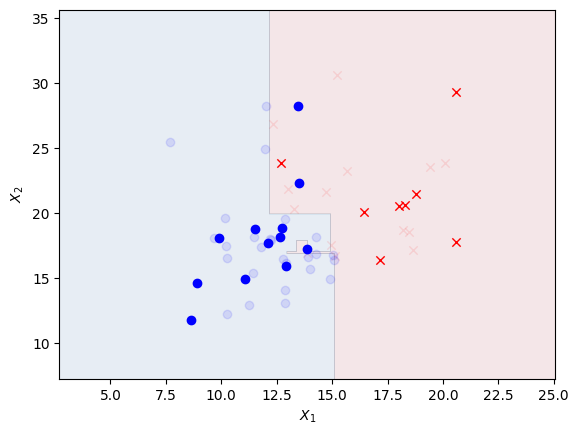

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.05)

gb.fit(X_train, y_train)

# Imprime las tasas de acierto
print("Training: ",gb.score(X_train, y_train))
print("Test: ", gb.score(X_test, y_test))

# Dibuja las fronteras de decisión
plot_decision_regions(X_train, y_train, X_test, y_test, gb, probs=False, resolucion=0.02, margin=5)
